In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
df = pd.read_csv("ObesityDataSetOriginal.csv")

In [3]:
df = df.drop('Weight' , axis=1)
df = df.drop('Height' , axis=1)

In [4]:
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [5]:
X = df.drop('NObeyesdad', axis=1) 
y = df['NObeyesdad']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

In [7]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=15)  
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [20]:
y_pred = knn.predict(X_test)

In [22]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7044917257683215
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.85      0.78        65
           1       0.60      0.23      0.33        52
           2       0.58      0.66      0.62        59
           3       0.70      0.97      0.81        64
           4       0.90      0.99      0.94        75
           5       0.66      0.51      0.57        53
           6       0.60      0.53      0.56        55

    accuracy                           0.70       423
   macro avg       0.68      0.68      0.66       423
weighted avg       0.69      0.70      0.68       423

Confusion Matrix:
 [[55  2  2  2  0  4  0]
 [14 12  7  5  2  2 10]
 [ 2  1 39  8  1  2  6]
 [ 0  0  0 62  0  2  0]
 [ 1  0  0  0 74  0  0]
 [ 3  3  9  4  4 27  3]
 [ 1  2 10  8  1  4 29]]


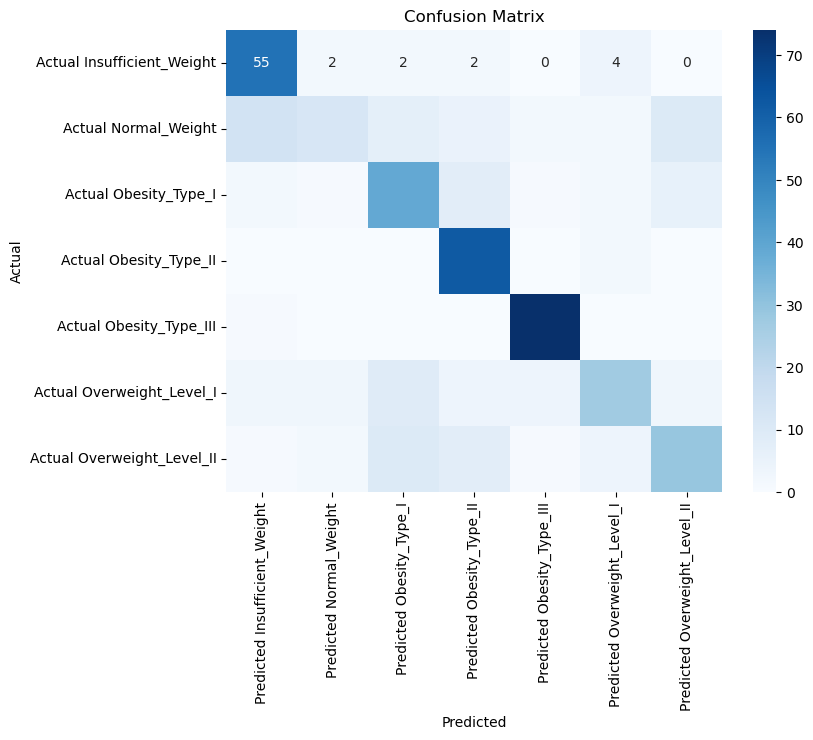

In [25]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Insufficient_Weight', 'Predicted Normal_Weight', 'Predicted Obesity_Type_I', 'Predicted Obesity_Type_II', 'Predicted Obesity_Type_III', 'Predicted Overweight_Level_I', 'Predicted Overweight_Level_II'], yticklabels=['Actual Insufficient_Weight', 'Actual Normal_Weight', 'Actual Obesity_Type_I', 'Actual Obesity_Type_II', 'Actual Obesity_Type_III', 'Actual Overweight_Level_I', 'Actual Overweight_Level_II'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

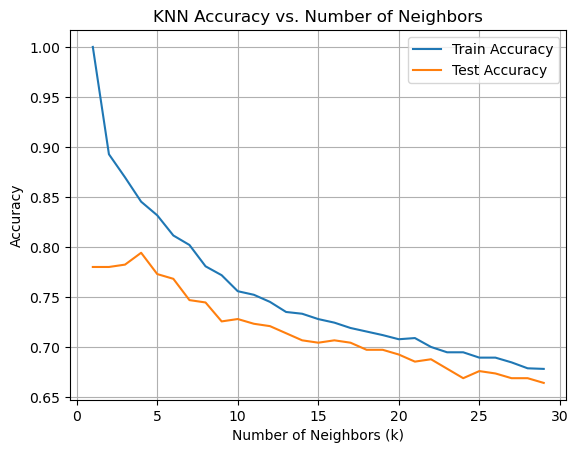

In [24]:
k_values = range(1, 30) 
train_accuracies = []
test_accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracies.append(knn.score(X_train, y_train))
    test_accuracies.append(knn.score(X_test, y_test))

plt.plot(k_values, train_accuracies, label='Train Accuracy')
plt.plot(k_values, test_accuracies, label='Test Accuracy')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy vs. Number of Neighbors')
plt.legend()
plt.grid()
plt.show()

In [16]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=4)  
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [17]:
y_pred = knn.predict(X_test)

In [18]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7943262411347518
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.94      0.84        65
           1       0.61      0.42      0.50        52
           2       0.72      0.81      0.76        59
           3       0.86      0.92      0.89        64
           4       0.96      0.99      0.97        75
           5       0.80      0.70      0.75        53
           6       0.73      0.64      0.68        55

    accuracy                           0.79       423
   macro avg       0.78      0.77      0.77       423
weighted avg       0.79      0.79      0.79       423

Confusion Matrix:
 [[61  0  1  1  0  2  0]
 [13 22  6  1  1  3  6]
 [ 1  2 48  3  0  2  3]
 [ 1  1  1 59  0  0  2]
 [ 0  1  0  0 74  0  0]
 [ 3  6  4  0  1 37  2]
 [ 1  4  7  5  1  2 35]]
